Total Stiffness Matrix: 
 [[    4666.7        0.     -7000.     -4666.7       -0.     -7000.
         0.         0.         0.         0.         0.         0. ]
 [       0.   1400000.         0.        -0.  -1400000.         0.
         0.         0.         0.         0.         0.         0. ]
 [   -7000.         0.     14000.      7000.        -0.      7000.
         0.         0.         0.         0.         0.         0. ]
 [   -4666.7       -0.      7000.   1054666.7        0.      7000.
  -1050000.         0.         0.         0.         0.         0. ]
 [      -0.  -1400000.        -0.         0.   1401968.8     3937.5
         0.     -1968.8     3937.5        0.         0.         0. ]
 [   -7000.         0.      7000.      7000.      3937.5    24500.
         0.     -3937.5     5250.         0.         0.         0. ]
 [       0.         0.         0.  -1050000.         0.         0.
   1054666.7        0.      7000.     -4666.7       -0.      7000. ]
 [       0.         0

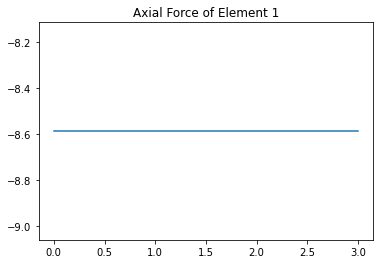

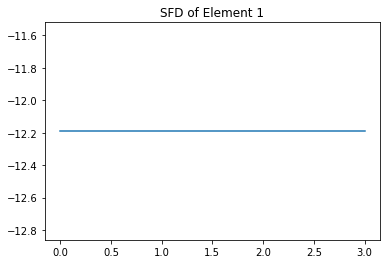

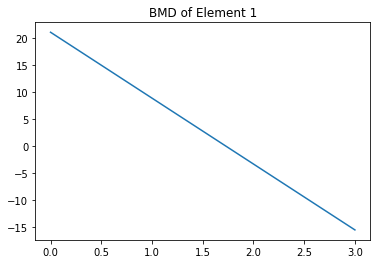

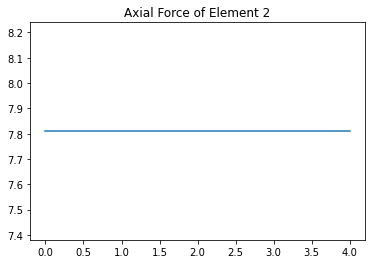

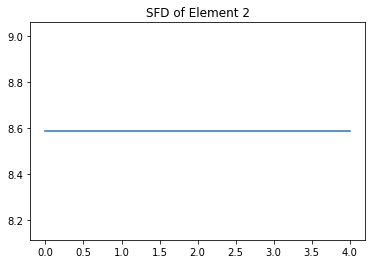

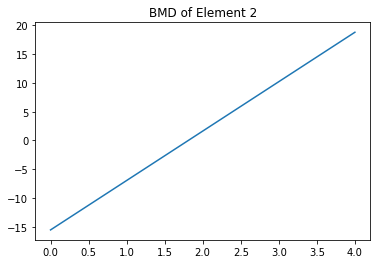

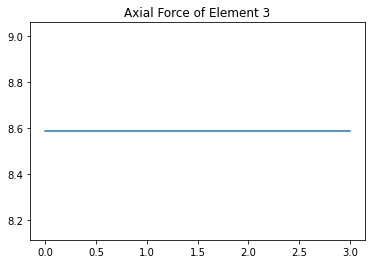

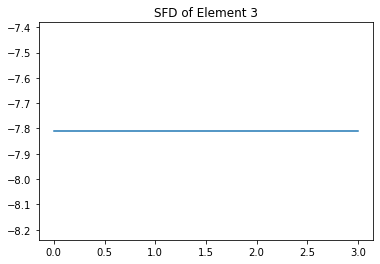

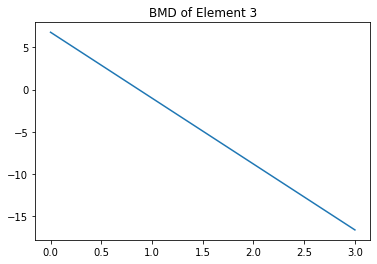

In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
E=210000000 #Young Modulus
A=2/100
I=5/100000 #Moment Of Interia
P=20
M=12
connected_nodes = [(1,2),(2,3),(3,4)]
theta=[90,0,270]
L = [3,4,3]
total_dof = 3
nodes = 4
ele = 3
for i in range(ele):
  Cos = math.cos(theta[i])
  Sin = math.sin(theta[i])
 
mat_K={}
for i in range(ele):
  Cos = math.cos(theta[i]*math.pi/180)
  Sin = math.sin(theta[i]*math.pi/180)
  w_1=(A*Cos*Cos)+(12*I*Sin*Sin/(L[i]*L[i]))
  w_2=(A*Sin*Sin)+(12*I*Cos*Cos/(L[i]*L[i]))
  w_3=(A-(12*I/(L[i]*L[i])))*Cos*Sin
  w_4=6*I*Sin/L[i]
  w_5=6*I*Cos/L[i]
  mat_K[i] = (E/L[i])*np.array([
                                w_1,w_3,-w_4,-w_1,-w_3,-w_4,
                                w_3,w_2,w_5,-w_3,-w_2,w_5,
                                -w_4,w_5,4*I,w_4,-w_5,2*I,
                                -w_1,-w_3,w_4,w_1,w_3,w_4,
                                -w_3,-w_2,-w_5,w_3,w_2,-w_5,
                                -w_4,w_5,2*I,w_4,-w_5,4*I
  ]).reshape((2*total_dof,2*total_dof))
 
tsm = np.zeros((total_dof*nodes,total_dof*nodes))
row_addition=[(-1,0,1),(1,2,3),(3,4,5),(5,6,7),(7,8,9),(9,10,11)]
for row in range(ele):
  a,b = connected_nodes[row]
  m,n = mat_K[row].shape

  # 1-2 values
  tsm[a+row_addition[a-1][0],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][0,0:m]
  tsm[a+row_addition[a-1][1],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][1,0:m]
  # rotation 1
  tsm[a+row_addition[a-1][2],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][2,0:m]
  tsm[b+row_addition[b-1][0],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][3,0:m]
  tsm[b+row_addition[b-1][1],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][4,0:m]
  #rotation 2
  tsm[b+row_addition[b-1][2],[a+row_addition[a-1][0],a+row_addition[a-1][1],a+row_addition[a-1][2],b+row_addition[b-1][0],b+row_addition[b-1][1],b+row_addition[b-1][2]]] += mat_K[row][5,0:m]
  
print('Total Stiffness Matrix: \n', np.round(tsm,1))

u=[0,0,0,1,1,1,1,1,1,0,0,0]
F = np.array([-P,0,0,0,0,M]).reshape((6,1))

Iter = 0
for i in u:
  if i==1:
    Iter+=1

m_reduced = []
for i in range(len(u)):
  for j in range(len(u)):
    if u[i]*u[j] == 1:
      m_reduced.append(tsm[i][j])
m_reduced = np.array(m_reduced).reshape((Iter,Iter))

disp = np.linalg.solve(m_reduced, F)
print('Displacement: \n', disp)

a=0
b=0
m_dis=[]
for i in u:
  if i == 1:
    m_dis.append(disp[a][0])
    a+=1
  else:
    m_dis.append(u[b])
  b+=1
m_dis = np.array(m_dis).reshape((total_dof*nodes,1))

force_reaction=np.matmul(tsm, m_dis)
print("force_reaction:\n",force_reaction)

mat_u={}
for i in range(len(connected_nodes)):
  a,b = connected_nodes[i]
  mat_u[i] = np.array([m_dis[a+row_addition[a-1][0],0],m_dis[a+row_addition[a-1][1],0],m_dis[a+row_addition[a-1][1]+1,0],m_dis[b+row_addition[b-1][0],0],m_dis[b+row_addition[b-1][1],0],m_dis[b+row_addition[b-1][1]+1,0]]).reshape((6,1))

k_dash = {}
for i in range(ele):
  k_dash[i] = np.array([
                        E*A/L[i],0,0,-E*A/L[i],0,0,
                        0,12*E*I/(L[i]**3),6*E*I/(L[i]**2),0,-12*E*I/(L[i]**3),6*E*I/(L[i]**2),
                        0,6*E*I/(L[i]**2),4*E*I/L[i],0,-6*E*I/(L[i]**2),2*E*I/L[i],
                        -E*A/L[i],0,0,E*A/L[i],0,0,
                        0,-12*E*I/(L[i]**3),-6*E*I/(L[i]**2),0,12*E*I/(L[i]**3),-6*E*I/(L[i]**2),
                        0,6*E*I/(L[i]**2),2*E*I/L[i],0,-6*E*I/(L[i]**2),4*E*I/L[i]
  ]).reshape((2*total_dof,2*total_dof))

mat_r={}
for i in range(ele):
  Cos = math.cos(theta[i]*math.pi/180)
  Sin = math.sin(theta[i]*math.pi/180)
  mat_r[i] = np.array([
                       Cos,Sin,0,0,0,0,
                       -Sin,Cos,0,0,0,0,
                       0,0,1,0,0,0,
                       0,0,0,Cos,Sin,0,
                       0,0,0,-Sin,Cos,0,
                       0,0,0,0,0,1
  ]).reshape((2*total_dof,2*total_dof))

mat_f={}
for i in range(ele):
  mat_f[i]=np.matmul(np.matmul(k_dash[i],mat_r[i]),mat_u[i])
  print('Nodal Force Vector '+str(i+1)+': \n',mat_f[i])

for i in range(len(L)):
  plt.figure()
  plt.title('Axial Force of Element '+str(i+1))
  plt.plot([0,L[i]],[-1*mat_f[i][0],-1*mat_f[i][0]])
  plt.figure()
  plt.title('SFD of Element '+str(i+1))
  plt.plot([0,L[i]],[mat_f[i][1],-1*mat_f[i][-2]])
  plt.figure()
  plt.title('BMD of Element '+str(i+1))
  plt.plot([0,L[i]],[-1*mat_f[i][2],mat_f[i][-1]])
  plt.show()